In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only
# add your own code where indicated.
# ATTENTION: Please do not add or remove any cells in the exercise. The grader
# will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset.
# This will require you doing a lot of data preprocessing because the dataset
# isn't split into training and validation for you.

import os
import random
import shutil
import tensorflow as tf
import zipfile
from os import getcwd
from shutil import copyfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# This code block unzips the full Cats-v-Dogs dataset to /tmp which will create
# a tmp/PetImages directory containing subdirectories called "Cat" and "Dog"
# (that's how the original researchers structured it).
path_cats_and_dogs = f"{getcwd()}/../tmp2/cats-and-dogs.zip"
shutil.rmtree("/tmp")

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [3]:
print(len(os.listdir("/tmp/PetImages/Cat/")))
print(len(os.listdir("/tmp/PetImages/Dog/")))

# Expected output:
# 1500
# 1500

1500
1500


In [4]:
# Use os.mkdir to create your directories.
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for "cats" and "dogs".

try:
    # YOUR CODE GOES HERE
    parent_1 = "/tmp/cats-v-dogs/"
    os.mkdir(parent_1)

    parent_2 = parent_1 + "training/"
    os.mkdir(parent_2)
    os.mkdir(parent_2 + "cats/")
    os.mkdir(parent_2 + "dogs/")

    parent_2 = parent_1 + "testing/"
    os.mkdir(parent_2)
    os.mkdir(parent_2 + "cats/")
    os.mkdir(parent_2 + "dogs/")
except OSError:
    pass

In [5]:
# Write a Python function called split_data which takes:
# a SOURCE directory containing the files;
# a TRAINING directory that a portion of the files will be copied to;
# a TESTING directory that a portion of the files will be copied to;
# a SPLIT SIZE to determine the portion.

# The files should also be randomized, so that the training set is a random X%
# of the files, and the test set is the remaining files.
# So, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9 then 90% of
# the images in PetImages/Cat will be copied to the TRAINING directory and 10%
# of the images will be copied to the TESTING directory.
# All images should be checked, and if they have a zero file length, they will
# not be copied over.

# os.listdir(DIRECTORY) gives you a listing of the contents of that directory.
# os.path.getsize(PATH) gives you the size of the file.
# copyfile(source, destination) copies a file from source to destination.
# random.sample(list, len(list)) shuffles a list.

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    # YOUR CODE STARTS HERE

    # Creates the list of files in the SOURCE directory, and shuffles this
    # list.
    files_list = os.listdir(SOURCE)
    num_files = len(files_list)
    files_list = random.sample(files_list, num_files)

    # Computes the number of files that will be copied to the TRAINING
    # directory.
    num_files_training = int(num_files * SPLIT_SIZE)

    # Loop for copying the files to the TRAINING directory.
    copied_to_training = 0
    while copied_to_training < num_files_training:
        file_name = files_list.pop(0)
        full_path = SOURCE + file_name
        if os.path.getsize(full_path) > 0:
            copyfile(full_path, TRAINING + file_name)
            copied_to_training += 1

    # Loop for copying the files to the TESTING directory.
    for file_name in files_list:
        full_path = SOURCE + file_name
        if os.path.getsize(full_path) > 0:
            copyfile(full_path, TESTING + file_name)

    # YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [6]:
print(len(os.listdir("/tmp/cats-v-dogs/training/cats/")))
print(len(os.listdir("/tmp/cats-v-dogs/training/dogs/")))
print(len(os.listdir("/tmp/cats-v-dogs/testing/cats/")))
print(len(os.listdir("/tmp/cats-v-dogs/testing/dogs/")))

# Expected output:
# 1350
# 1350
# 150
# 150

1350
1350
150
150


In [7]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS.
# USE AT LEAST 3 CONVOLUTION LAYERS.

# Later, I'll play around with the values of the HYPERPARAMETERS. Then, for
# convenience, I'll set all of these values in the same place.

activations = {}
activations["conv1"] = "relu"
activations["conv2"] = "relu"
activations["conv3"] = "relu"
activations["conv4"] = "relu"
activations["dense1"] = "relu"

convolutions = {}
convolutions["conv1"] = 32
convolutions["conv2"] = 64
convolutions["conv3"] = 128
convolutions["conv4"] = 128

dimension = {}
dimension["convolution"] = 3
dimension["input_shape"] = 150
dimension["pooling"] = 2

BATCH_SIZE = 10
hidden_units = 512
learning_rate = 10 ** (-4)

# Hyperparameters related to the AUGMENTATION:
HEIGHT_SHIFT_RANGE = 0.2
ROTATION_RANGE = 40
SHEAR_RANGE = 0.2
WIDTH_SHIFT_RANGE = 0.2
ZOOM_RANGE = 0.2

model = tf.keras.models.Sequential([
    # YOUR CODE HERE

    # 1st convolutional layer:
    tf.keras.layers.Conv2D(
        convolutions["conv1"],
        (dimension["convolution"], dimension["convolution"]),
        activation=activations["conv1"],
        input_shape=(dimension["input_shape"], dimension["input_shape"], 3)
    ),
    tf.keras.layers.MaxPooling2D(dimension["pooling"], dimension["pooling"]),

    # 2nd convolutional layer:
    tf.keras.layers.Conv2D(
        convolutions["conv2"],
        (dimension["convolution"], dimension["convolution"]),
        activation=activations["conv2"]
    ),
    tf.keras.layers.MaxPooling2D(dimension["pooling"], dimension["pooling"]),

    # 3rd convolutional layer:
    tf.keras.layers.Conv2D(
        convolutions["conv3"],
        (dimension["convolution"], dimension["convolution"]),
        activation=activations["conv3"]
    ),
    tf.keras.layers.MaxPooling2D(dimension["pooling"], dimension["pooling"]),

    # 4th convolutional layer:
    tf.keras.layers.Conv2D(
        convolutions["conv4"],
        (dimension["convolution"], dimension["convolution"]),
        activation=activations["conv4"]
    ),
    tf.keras.layers.MaxPooling2D(dimension["pooling"], dimension["pooling"]),

    # Flattens the results:
    tf.keras.layers.Flatten(),

    # Hidden layer:
    tf.keras.layers.Dense(hidden_units, activation=activations["dense1"]),

    # Only 1 output neuron, since this is a binary classification problem.
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    metrics=["acc"],
    optimizer=RMSprop(lr=learning_rate)
)

# NOTE:

In the cell below you **MUST** use a batch size of 10 (`batch_size=10`) for the
`train_generator` and the `validation_generator`. Using a batch size greater
than 10 will exceed memory limits on the Coursera platform.

In [8]:
# YOUR CODE HERE
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(
    fill_mode="nearest",
    height_shift_range=HEIGHT_SHIFT_RANGE,
    horizontal_flip=True,
    rescale=1/255,
    rotation_range=ROTATION_RANGE,
    shear_range=SHEAR_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    zoom_range=ZOOM_RANGE
)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE TRAIN
# GENERATOR.
# YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    target_size=(dimension["input_shape"], dimension["input_shape"])
)

# YOUR CODE HERE
VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1/255)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE VALIDATION
# GENERATOR.
# YOUR CODE HERE
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    target_size=(dimension["input_shape"], dimension["input_shape"])
)

# Expected output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator,
    epochs=2,
    steps_per_epoch=270, # 2700 images = BATCH_SIZE * steps_per_epoch
    validation_data=validation_generator,
    validation_steps=30, # 300 images = BATCH_SIZE * validation_steps
    verbose=2
)

Epoch 1/2
270/270 - 67s - loss: 0.6849 - acc: 0.5556 - val_loss: 0.6785 - val_acc: 0.5967
Epoch 2/2
270/270 - 60s - loss: 0.6632 - acc: 0.5874 - val_loss: 0.6345 - val_acc: 0.6633


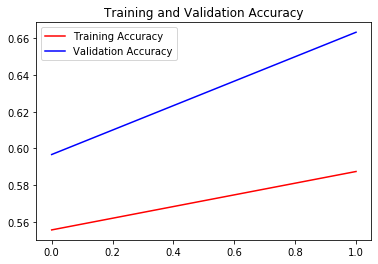

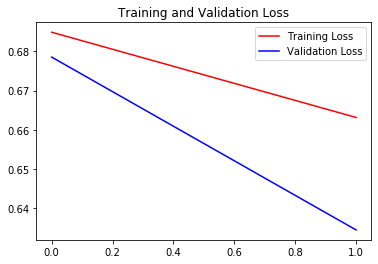

In [10]:
# PLOTS LOSS AND ACCURACY.
%matplotlib inline
import matplotlib.pyplot as plt

# Retrieves results on training and test datasets for each training epoch.

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Gets the number of epochs.
epochs = range(len(acc))

# Plots training and validation accuracy per epoch.
plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.figure()

# Plots training and validation loss per epoch.
plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

# Submission Instructions

In [11]:
# Now click the "Submit Assignment" button above.

# When you're done or would like to take a break, please run the two cells below
to save your work and close the notebook. This will free up resources for your
fellow learners.

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);